In [1]:
from simulation import bootstrap_simulation, partial_state_update_blocks, CommonsSimulationConfiguration
import json
import argparse
import pandas as pd
from cadCAD.configuration import Experiment
from cadCAD.configuration.utils import config_sim
from cadCAD.engine import ExecutionContext, ExecutionMode, Executor
from cadCAD import configs

ModuleNotFoundError: No module named 'scipy'

In [2]:
c = CommonsSimulationConfiguration()
print(c)

<CommonsSimulationConfiguration {'days_to_80p_of_max_voting_weight': 10, 'exit_tribute': 0.35, 'hatch_tribute': 0.2, 'hatchers': 5, 'kappa': 2, 'max_proposal_request': 0.2, 'proposals': 2, 'vesting_80p_unlocked': 60}>


In [3]:
initial_conditions, simulation_parameters = bootstrap_simulation(c)

exp = Experiment()
exp.append_configs(
    initial_state=initial_conditions,
    partial_state_update_blocks=partial_state_update_blocks,
    sim_configs=simulation_parameters
)

# Do not use multi_proc, breaks ipdb.set_trace()
exec_mode = ExecutionMode()
single_proc_context = ExecutionContext(exec_mode.single_proc)
executor = Executor(single_proc_context, configs)

raw_system_events, tensor_field, sessions = executor.execute()



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: single_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (30, 3, 1, 6)
Execution Method: single_proc_exec
Execution Mode: single_threaded
ProposalFunding: Proposal 5 has 0.0 conviction, and needs 28184141.17263599 to pass
ProposalFunding: Proposal 6 has 0.0 conviction, and needs 27271617.305509195 to pass
ParticipantVoting: Participant 0 was given Proposals with corresponding affinities {5: 0.7879893291336838, 6: 0.23531752363376268} and he decided to vote on {5: 0.7879893291336838}, distributing his tokens thusly {5: 5424653.810146806}
ParticipantVoting: Participant 1 was given Proposals with corresponding affinities {5: 0.7264981986469651, 6: 0.45219816859082773} and he decided to vote on {5: 0.7264981986469651}, distribu

In [4]:
df = pd.DataFrame(raw_system_events)
df_final = df[df.substep.eq(2)]


NameError: name 'raw_result' is not defined

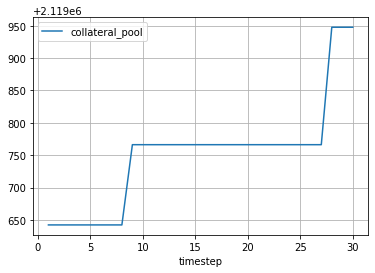

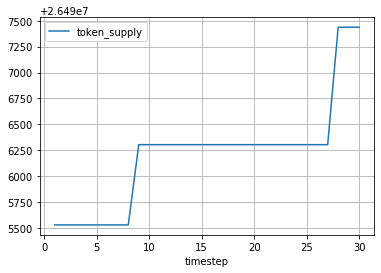

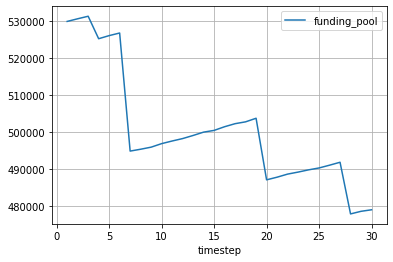

In [5]:
df_final.plot("timestep", "collateral_pool", grid=True)
df_final.plot("timestep", "token_supply", grid=True)
df_final.plot("timestep", "funding_pool", grid=True)

In [6]:
# import matplotlib.pyplot as plt
# supporters = get_edges_by_type(network, 'support')
# influencers = get_edges_by_type(network, 'influence')
# competitors = get_edges_by_type(network, 'conflict')

# nx.draw_kamada_kawai(network, nodelist = get_participants(network), edgelist=supporters)
# plt.title('Participants Social Network')